# Project: CandyHierarchy2017 _Data Cleaning

- Dataset Description
- important Libraries and Data
- Data preperation
  - Missing data
  - inconsistent data
- Data Visualization
- Conclusion 

- ## Dataset Description :

https://drive.google.com/drive/u/0/folders/1THFVmmCrMP87eutjbIrSXJCTJLsR9-DS

 ###  i will go through candy data 2017 , this data has :

- **Internal_ID**


- **Q1-Going Out?**: Are you actually going trick or treating yourself? "has values **Yes or No**"


- **Q2-Gender**: It has four different options, **Femal** ,**Male** ,**Other** ,**I'd rather not say**


- **Q3-Age**: Numerical field


- **Q4-Country**: Text Field, but users have written their own version of the names.  


- **Q5-State/Province**: Text Field, but users have written their own version of the names. Same as the country data.


- **Q6-Joy Or Despair**: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).


- **Q7-Joy Other**: Text Field to write items not included above that give you JOY. 


- **Q8-Despair Other**: Text Field ti write items not included above that give you DESPAIR. 


- **Q9-Other Comments**: Text Field. 


- **Q10-Dress**: Binary field.


- **Q11-Day**: Binary Answer Field. 

- ## Data Perpetration :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


np.random.seed(0)
%matplotlib inline

In [2]:
Candy=pd.read_excel("candydata.xlsx")

C:\Users\menat\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
Candy.head(10)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
5,90272852,No,Male,NaN,NaN,NaN,JOY,DESPAIR,JOY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"(75, 23)"
6,90272853,No,Male,53,usa,Colorado,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,90272854,No,Male,33,canada,ontario,JOY,DESPAIR,JOY,DESPAIR,...,when the little kids get the big chocolate bar...,"first person to give out cans of beer, wins",Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(55, 5)"
8,90272858,No,Male,40,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,NaN,NaN,Blue and black,NaN,Sunday,NaN,1.0,NaN,NaN,"(76, 24)"
9,90272859,No,Female,53,Us,Wa,MEH,DESPAIR,JOY,MEH,...,NaN,NaN,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(70, 28)"


In [4]:
Candy.shape

(2460, 120)

In [5]:
Candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [6]:
Candy.dtypes

Internal ID                   int64
Q1: GOING OUT?               object
Q2: GENDER                   object
Q3: AGE                      object
Q4: COUNTRY                  object
                             ...   
Q12: MEDIA [Daily Dish]     float64
Q12: MEDIA [Science]        float64
Q12: MEDIA [ESPN]           float64
Q12: MEDIA [Yahoo]          float64
Click Coordinates (x, y)     object
Length: 120, dtype: object

In [7]:
Candy= Candy.rename(columns={'Q1: GOING OUT?':'Going out','Q2: GENDER':'Gender','Q3: AGE':'Age','Q4: COUNTRY':'Country','Q5: STATE':'State','Q10: DRESS':'Dress','Q11: DAY':'Day'})

- ## Data Cleaning :

### 1.Going Out?

In [8]:
Candy['Going out'].dtypes

dtype('O')

In [9]:
Candy['Going out'].head()

0    NaN
1     No
2    NaN
3     No
4     No
Name: Going out, dtype: object

In [10]:
Candy['Going out'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [11]:
Candy['Going out'].describe()

count     2350
unique       2
top         No
freq      2038
Name: Going out, dtype: object

In [12]:
Candy['Going out'].isna().sum()

110

The data has 2460 column, There is only 110 NAN values in [Going out] column, so we can drop missing values.

In [13]:
Candy = Candy.dropna(subset = ['Going out'])

In [14]:
assert Candy['Going out'].isna().sum()== 0

There is not still any NAN values.

In [15]:
Candy['Going out'].describe()

count     2350
unique       2
top         No
freq      2038
Name: Going out, dtype: object

In [16]:
Candy['Going out'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
Candy['Going out'].value_counts()

No     2038
Yes     312
Name: Going out, dtype: int64

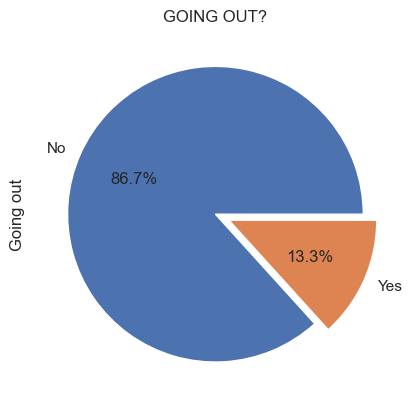

In [18]:
Candy['Going out'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=False)
plt.title('GOING OUT?')
plt.show()

There is 86.7% people not going to trick or treat.

### 2. Gender :

In [19]:
Candy['Gender'].head()

1    Male
3    Male
4    Male
5    Male
6    Male
Name: Gender, dtype: object

In [20]:
Candy['Gender'].unique()

array(['Male', 'Female', "I'd rather not say", nan, 'Other'], dtype=object)

In [21]:
Candy['Gender'].describe()

count     2336
unique       4
top       Male
freq      1404
Name: Gender, dtype: object

In [22]:
Candy['Gender'].isna().sum()

14

The data has 2336 column, There is only 14 NAN values in [Going out] column, so we can drop missing values.

In [23]:
Candy = Candy.dropna(subset = ['Gender'])

In [24]:
assert Candy['Going out'].isna().sum()== 0

In [25]:
Candy['Gender'].value_counts()

Male                  1404
Female                 825
I'd rather not say      78
Other                   29
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

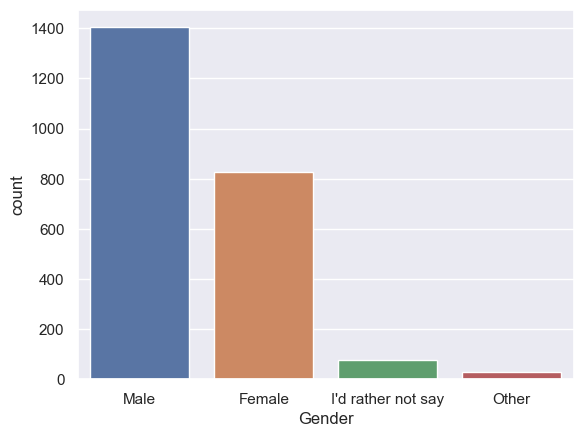

In [26]:
sns.countplot(x='Gender', data=Candy)

More than 50% of data are males👨 .

### 3. AGE :

In [27]:
Candy['Age'].head()

1     44
3     40
4     23
5    NaN
6     53
Name: Age, dtype: object

In [28]:
Candy['Age'].isna().sum()

49

In [29]:
Candy['Age'].unique()

array([44, 40, 23, nan, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45, 49,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 41, 27, 61, 46, 42, 62, 29,
       39, 32, 31, 28, 69, 67, 22, 26, 51, 70, 24, 18, 19, 'Old enough',
       57, 60, 66, 12, 30, 'Many', 65, 55, 72, '?', 21, 11, 'no', 9, 68,
       20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88, 39.4,
       74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [30]:
Candy['Age']= pd.to_numeric(Candy['Age'],errors='coerce')

In [31]:
Candy['Age'].unique()

array([  44. ,   40. ,   23. ,    nan,   53. ,   33. ,   43. ,   56. ,
         64. ,   37. ,   59. ,   48. ,   54. ,   36. ,   45. ,   49. ,
         25. ,   34. ,   35. ,   38. ,   58. ,   50. ,   47. ,   16. ,
         52. ,   63. ,   41. ,   27. ,   61. ,   46. ,   42. ,   62. ,
         29. ,   39. ,   32. ,   31. ,   28. ,   69. ,   67. ,   22. ,
         26. ,   51. ,   70. ,   24. ,   18. ,   19. ,   57. ,   60. ,
         66. ,   12. ,   30. ,   65. ,   55. ,   72. ,   21. ,   11. ,
          9. ,   68. ,   20. ,    6. ,   10. ,   71. ,   90. ,   13. ,
        312. ,   99. ,    7. ,   88. ,   39.4,   74. ,  102. ,   17. ,
         15. ,    8. ,   75. ,   14. ,  100. ,   76. , 1000. ,   77. ,
         73. ,   70.5,    1. ,    4. ])

In [32]:
Candy['Age'].isna().sum()

73

In [33]:
Candy['Age']=Candy['Age'].fillna(0)

In [34]:
Candy['Age'].describe()

count    2336.00000
mean       41.29405
std        24.92591
min         0.00000
25%        34.00000
50%        41.00000
75%        49.00000
max      1000.00000
Name: Age, dtype: float64

 The mean and the median of the data are approximately same so we can replace NAN of any of them 😀.

<AxesSubplot:title={'center':'Age'}>

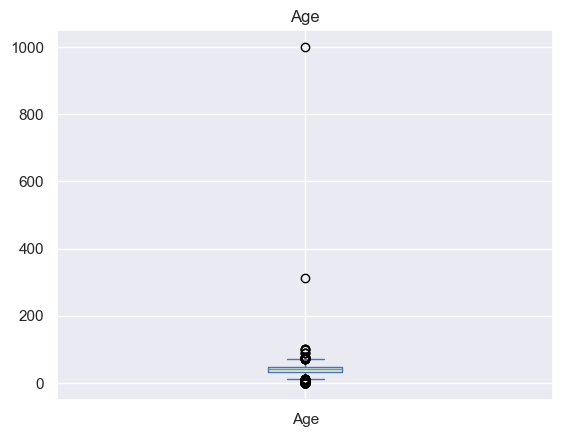

In [35]:
Candy['Age'].plot(kind='box',title='Age')

There is many outliers in our data .

In [36]:
Candy.loc[Candy['Age']>80, 'Age']=Candy['Age'].mean()
Candy.loc[Candy['Age']<18, 'Age']=Candy['Age'].mean()

<AxesSubplot:title={'center':'Age'}>

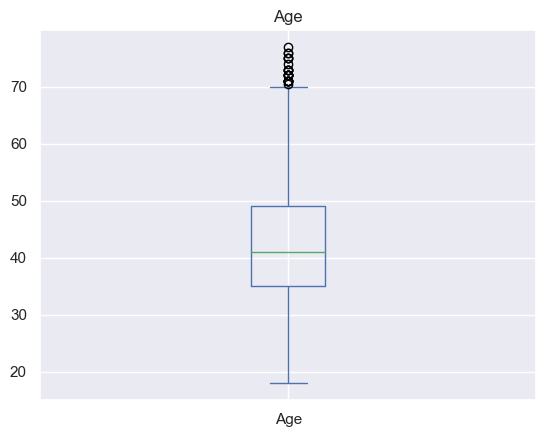

In [37]:
Candy['Age'].plot(kind='box',title='Age')

In [38]:
Candy['Age'].describe()

count    2336.000000
mean       42.524739
std        10.616690
min        18.000000
25%        35.000000
50%        41.000000
75%        49.000000
max        77.000000
Name: Age, dtype: float64

In [39]:
Candy['Age']=Candy['Age'].astype('int')

In [40]:
Candy['Age'].dtype

dtype('int32')

In [41]:
Candy['Age'].unique()

array([44, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45, 49, 25, 34,
       35, 38, 58, 50, 47, 52, 63, 41, 27, 61, 46, 42, 62, 29, 39, 32, 31,
       28, 69, 67, 22, 26, 51, 70, 24, 18, 19, 57, 60, 66, 30, 65, 55, 72,
       21, 68, 20, 71, 74, 75, 76, 77, 73])

In [42]:
Candy['Age'].max()

77

In [43]:
Candy['Age'].isna().sum()

0

C:\Users\menat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

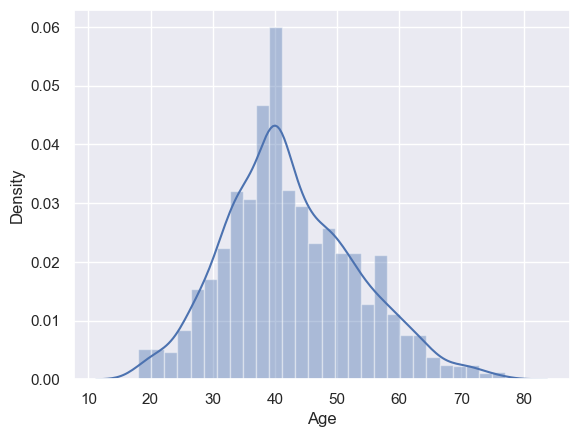

In [44]:
sns.distplot(Candy['Age'])

The Range of Ages are between 18 and 77 🤓.

### 4.COUNTRY :

In [45]:
Candy['Country'].head()

1    USA 
3      us
4     usa
5     NaN
6     usa
Name: Country, dtype: object

In [46]:
Candy['Country'].unique()

array(['USA ', 'us', 'usa', nan, 'canada', 'Canada', 'Us', 'US', 'Murica',
       'USA', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'Mexico',
       'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35, 'france',
       'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'Australia', 'insanity lately',
       'Greece', 'USA? Hard to tell anymore..', "'merica", 'usas',
       'Pittsburgh', 45, 'United State', 32, 'France', 'australia', 'A',
       'Can', 'Canae', 'Trumpistan', 'Ireland', 'United Sates', 'Korea',
       'California', 'Japan', 'USa', 'Sout

Their is an inconsistency in our data 😥.

In [47]:
Candy['Country'] = Candy['Country'].str.lower()

In [48]:
Candy['Country'].value_counts()

usa                                                                     1015
united states                                                            535
canada                                                                   206
us                                                                       175
usa                                                                       70
                                                                        ... 
korea                                                                      1
california                                                                 1
south africa                                                               1
i pretend to be from canada, but i am really from the united states.       1
fear and loathing                                                          1
Name: Country, Length: 95, dtype: int64

In [49]:
Candy['Country']=Candy['Country'].astype('category')

In [50]:
Candy['Country'].dtype

CategoricalDtype(categories=[''merica', 'a', 'ahem....amerca', 'alaska', 'america',
                  'atlantis', 'australia', 'california', 'can', 'canada',
                  'canada ', 'canae', 'china', 'costa rica', 'denmark',
                  'earth', 'endland', 'england', 'europe', 'fear and loathing',
                  'finland', 'france', 'france ', 'germany', 'greece',
                  'hong kong', 'i don't know anymore',
                  'i pretend to be from canada, but i am really from the united states.',
                  'iceland', 'indonesia', 'insanity lately', 'ireland',
                  'ireland ', 'japan', 'korea', 'mexico', 'murica', 'murrika',
                  'n. america', 'narnia', 'netherlands', 'new jersey',
                  'north carolina ', 'pittsburgh', 'scotland', 'scotland ',
                  'singapore', 'south africa', 'soviet canuckistan', 'spain',
                  'subscribe to dm4uz3 on youtube', 'sweden', 'switzerland',
                  'ta

In [51]:
Candy['Country']= Candy['Country'].str.strip()
Candy['Country']= Candy['Country'].str.replace('.','')
Candy['Country']= Candy['Country'].str.replace(' ','')

C:\Users\menat\AppData\Local\Temp\ipykernel_12796\2156515248.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Candy['Country']= Candy['Country'].str.replace('.','')


In [52]:
Candy['Country'] = Candy['Country'].replace({'usa':'unitedstates','us':'unitedstates','unitedstaes':'unitedstates','unitedsates':'unitedstates','united states':'unitedstates','unitedstatesofamerica':'unitedstates','uk':'unitedkingdom','unitedstate':'unitedstates'})

In [53]:
Candy['Country'].unique()

array(['unitedstates', nan, 'canada', 'murica', 'unitedkingdom', 'uae',
       'england', 'mexico', 'usausausa', 'america', 'france', 'finland',
       'unhingedstates', 'usofa', 'unitesstates', 'theunitedstates',
       'northcarolina', 'uniedstates', 'netherlands', 'germany', 'europe',
       'earth', 'costarica', 'theunitedstatesofamerica', 'unitestates',
       'australia', 'insanitylately', 'greece', 'usa?hardtotellanymore',
       "'merica", 'usas', 'pittsburgh', 'a', 'can', 'canae', 'trumpistan',
       'ireland', 'korea', 'california', 'japan', 'southafrica',
       'ipretendtobefromcanada,butiamreallyfromtheunitedstates',
       'iceland', 'scotland', 'denmark', 'unitedstated', 'switzerland',
       'ahemamerca', 'ud', 'newjersey', 'indonesia', 'thenetherlands',
       'unitedstatss', 'endland', 'atlantis', 'murrika', 'usa!usa!usa!',
       'usaa', 'alaska', 'sovietcanuckistan', 'namerica', 'singapore',
       'ussa', 'china', 'taiwan', 'hongkong', 'spain', 'sweden', 'narnia',

In [54]:
Candy['Country'].isna().sum()

36

In [55]:
Candy['Country'].describe()

count             2300
unique              74
top       unitedstates
freq              1929
Name: Country, dtype: object

In [56]:
Candy['Country'].value_counts()

unitedstates       1929
canada              213
unitedkingdom        33
germany              10
australia             7
                   ... 
canae                 1
trumpistan            1
korea                 1
southafrica           1
fearandloathing       1
Name: Country, Length: 74, dtype: int64

In [66]:
Candy['Country']=Candy['Country'].astype('category')

In [67]:
assert Candy['Country'].dtype== 'category'

In [68]:
Candy['Country'].describe()

count             2300
unique              74
top       unitedstates
freq              1929
Name: Country, dtype: object

In [69]:
Candy['Country'].isna().sum()

36

There is only 36 NAN values so we can drop it ✂️.

In [72]:
Candy = Candy.dropna(subset = ['Country'])

In [73]:
Candy['Country'].isna().sum()

0

There is 1929 person fron unitedstates 🤨.